<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [ ]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])



We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier






This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 





## Load the dataframe


Load the data


In [4]:
#from js import fetch
#import io

request = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(request)

#resp1 = await fetch(URL1)
#text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
#data = pd.read_csv(URL1)
data.head()


#URL1.to_csv('C:\Users\kenyo\OneDrive\Documents\COURSERA\CAPSTONE Course 10\Mod 4.csv', unicode='utf-8')



,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
#resp2 = await fetch(URL2)
#text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(URL2)



In [14]:
X.head(10)


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,6.0,3325.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,7.0,2296.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,8.0,1316.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,9.0,4535.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,10.0,4428.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [6]:
#Create a NumPy from the column class in data, apply to_numpy() to the column class in data, and store it in the variable y, make sure the output is a Pandas series (only one bracket), df['name of column'])

y = data['Class'].to_numpy()
y = pd.Series(y)
y.head()




0    0
1    0
2    0
3    0
4    0
dtype: int64

### TASK  2


In [9]:
#Standardize the data in X then reassign it to the variable X using the transform provided below.
# students get this
#KLS WORKSPACE 2
#import pandas as pd
#from sklearn import preprocessing

# Drop the column 'Class' from data, and store the remaining columns in the variable X
X = data.drop('Class', axis=1)

# Separate numeric and non-numeric columns
numeric_cols = X.select_dtypes(include=['number']).columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Handle missing values
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())
X[non_numeric_cols] = X[non_numeric_cols].fillna(X[non_numeric_cols].mode().iloc[0])

# Standardize the numeric data in X using the transform provided
transform = preprocessing.StandardScaler()
X[numeric_cols] = transform.fit_transform(X[numeric_cols])

# Convert the transformed data back to a DataFrame
X = pd.DataFrame(X, columns=data.columns.drop('Class'))

# Display the first few rows of the standardized DataFrame
X.head()




,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,-1.712912,2010-06-04,Falcon 9,-1.948145e-16,LEO,CCAFS SLC 40,None None,-0.653913,False,False,False,5e9e3032383ecb6bb234e7ca,-1.575895,-0.97344,B0003,0.411430,-0.417073
1,-1.674419,2012-05-22,Falcon 9,-1.195232e+00,LEO,CCAFS SLC 40,None None,-0.653913,False,False,False,5e9e3032383ecb6bb234e7ca,-1.575895,-0.97344,B0005,0.411430,-0.417073
2,-1.635927,2013-03-01,Falcon 9,-1.162673e+00,ISS,CCAFS SLC 40,None None,-0.653913,False,False,False,5e9e3032383ecb6bb234e7ca,-1.575895,-0.97344,B0007,0.411430,-0.417073
3,-1.597434,2013-09-29,Falcon 9,-1.200587e+00,PO,VAFB SLC 4E,False Ocean,-0.653913,False,False,False,5e9e3032383ecb6bb234e7ca,-1.575895,-0.97344,B1003,-2.433736,2.433637
4,-1.558942,2013-12-03,Falcon 9,-6.286706e-01,GTO,CCAFS SLC 40,None None,-0.653913,False,False,False,5e9e3032383ecb6bb234e7ca,-1.575895,-0.97344,B1004,0.411430,-0.417073


In [ ]:
X.tail()


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)




Train set: (72, 17) (72,)
Test set: (18, 17) (18,)


we can see we only have 18 test samples.


In [11]:
y_test.shape


(18,)

## TASK  4


In [12]:
#TASK 4
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Convert categorical features to numerical
X = pd.get_dummies(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Define the parameter grid
parameters = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}

# Initialize the Logistic Regression model
LR = LogisticRegression()

# Initialize GridSearchCV
clf = GridSearchCV(LR, parameters, cv=10)

# Fit the model
clf.fit(X_train, y_train)

# Get the best parameters
print(clf.best_params_)
# Get the best score
print(clf.best_score_)




{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.8625


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [13]:
#kls workspace 3
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
LR = LogisticRegression()
clf = GridSearchCV(LR, parameters, cv=10)
clf.fit(X_train, y_train)
print(clf.best_params_)


#y_predict = clf.predict(X_test)
#y_predict_proba = clf.predict_proba(X_test)
#clf.best_params_
#clf.best_score_
#clf.best_estimator_
#clf.cv_results_
#clf.cv_results_['mean_test_score']
#clf.cv_results_['std_test_score']




{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [14]:
#print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
#clf.best_params_
clf.best_score_
#clf.cv_results_
#print("accuracy :",logreg_cv.best_score_)
#clf.cv_results_['mean_test_score']
#print("accuracy :",logreg_cv.best_score_)
#clf.cv_results_['mean_test_score']
#clf.cv_results_['std_test_score']



0.8625

## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [15]:
#Calculate the accuracy on the test data using the method score
# #kls workspace Z Method Score: 0.9948717948717949
#TASK 5
# Import the library
from sklearn.metrics import classification_report, confusion_matrix
# Predict the target values
y_predict = clf.predict(X_test)
# Print the classification report
print(classification_report(y_test, y_predict))
# Print the confusion matrix
print(confusion_matrix(y_test, y_predict))
# Print the accuracy score
print("Method Score:", clf.score(X_test, y_test))


              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.83      1.00      0.91        10

    accuracy                           0.89        18
   macro avg       0.92      0.88      0.88        18
weighted avg       0.91      0.89      0.89        18

[[ 6  2]
 [ 0 10]]
Method Score: 0.8888888888888888


Lets look at the confusion matrix:


Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [16]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm_cv = SVC()
clf_svm = GridSearchCV(svm_cv, parameters, cv=10)
clf_svm.fit(X_train, y_train)
print(clf_svm.best_params_)
print(clf_svm.best_score_)




{'C': 1.0, 'gamma': 0.001, 'kernel': 'linear'}
0.9446428571428571


In [ ]:
#kls TASK 6
#results
#{'C': 1.0, 'gamma': 0.001, 'kernel': 'linear'}
#0.9446428571428571

## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [17]:
#kls TASK 7
#Caluclate the accuracy on the test data using the method score
#Method Score: 0.9923076923076923
# Import the library
from sklearn.metrics import classification_report, confusion_matrix
# Predict the target values
y_predict = clf_svm.predict(X_test)
# Print the classification report
print(classification_report(y_test, y_predict))
# Print the confusion matrix
print(confusion_matrix(y_test, y_predict))
# Print the accuracy score
print("Method Score:", clf_svm.score(X_test, y_test))





              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.91      1.00      0.95        10

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18

[[ 7  1]
 [ 0 10]]
Method Score: 0.9444444444444444


We can plot the confusion matrix


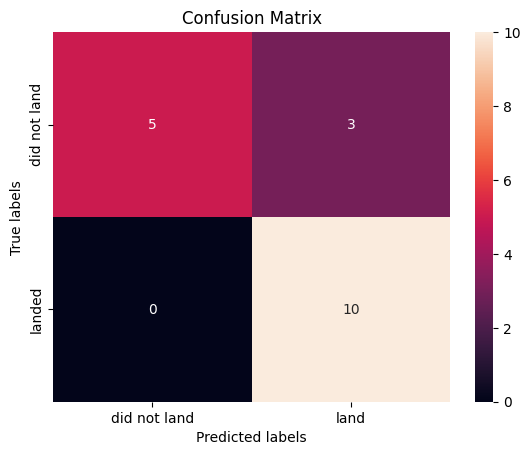

In [24]:
#yhat=svm_cv.predict(X_test)
#plot_confusion_matrix(Y_test,yhat)

plot_confusion_matrix(y_test, y_predict)


## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [18]:
from sklearn.tree import DecisionTreeClassifier

#kls TASK 8
#Decision Tree
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt', 'log2'],  # Updated value for max_features
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
clf_tree = GridSearchCV(tree, parameters, cv=10)
clf_tree.fit(X_train, y_train)

print(clf_tree.best_params_)
#print(clf.best_score_)




{'criterion': 'gini', 'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [29]:
#print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",clf_tree.best_score_)
print(clf_tree.best_score_)


accuracy : 0.9464285714285715
0.9464285714285715


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [30]:
#kls TASK 9
#Caluclate the accuracy on the test data using the method score
#Method Score:
# Import the library
from sklearn.metrics import classification_report, confusion_matrix
# Predict the target values
y_predict = clf_tree.predict(X_test)
# Print the classification report
print(classification_report(y_test, y_predict))
# Print the confusion matrix
print(confusion_matrix(y_test, y_predict))
# Print the accuracy score
print("Method Score:", clf_tree.score(X_test, y_test))





              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[ 8  0]
 [ 0 10]]
Method Score: 1.0


We can plot the confusion matrix


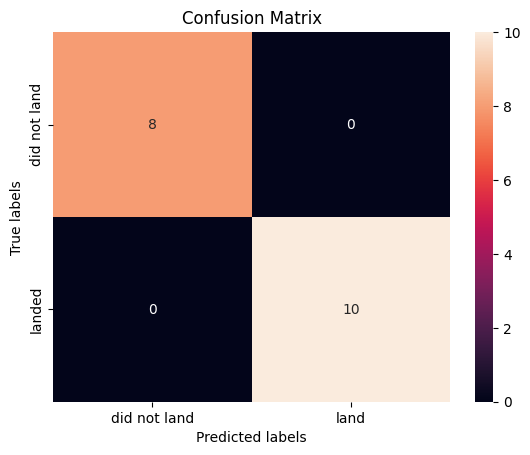

In [31]:
Y_predict = clf_tree.predict(X_test)
plot_confusion_matrix(y_test,Y_predict)



## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [32]:
#kls TASK 10
#K Nearest Neighbors
# Define the parameter values that should be searched
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# Initialize the model
KNN = KNeighborsClassifier()
# Apply GridSearchCV
clf_KNN = GridSearchCV(KNN, parameters, cv=10)
# Fit the model
clf_KNN.fit(X_train, y_train)
# Print the best parameters
print(clf_KNN.best_params_)
# Print the accuracy score
print(clf_KNN.best_score_)





{'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}
0.9035714285714287


In [33]:
print("tuned hpyerparameters :(best parameters) ",clf_KNN.best_params_)
print("accuracy :",clf_KNN.best_score_)




tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}
accuracy : 0.9035714285714287


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [34]:
#kls TASK 11
#Calculate the accuracy of KNN clf on the test data using the method score
#Method Score: 0.9961538461538462
# Import the library
from sklearn.metrics import classification_report, confusion_matrix
# Predict the target values
y_predict = clf_KNN.predict(X_test)
# Print the classification report
print(classification_report(y_test, y_predict))
# Print the confusion matrix
print(confusion_matrix(y_test, y_predict))
# Print the accuracy score
print("Method Score:", clf_KNN.score(X_test, y_test))




              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.77      1.00      0.87        10

    accuracy                           0.83        18
   macro avg       0.88      0.81      0.82        18
weighted avg       0.87      0.83      0.82        18

[[ 5  3]
 [ 0 10]]
Method Score: 0.8333333333333334


We can plot the confusion matrix


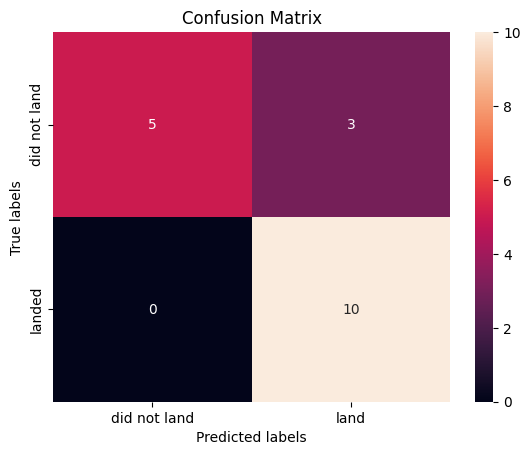

In [35]:
Y_predict = clf_KNN.predict(X_test)
plot_confusion_matrix(y_test,Y_predict)





## TASK  12


Find the method performs best:


In [27]:
#kls TASK 12
#Find the method performs best

# Create a dictionary to store the scores of each method
scores = {'Logistic Regression': clf.best_score_,
          'Support Vector Machine': clf_svm.best_score_,
          'Decision Tree': clf_tree.best_score_,
          'K Nearest Neighbors': clf_KNN.best_score_}


# Find the method with the highest score
best_method = max(scores, key=scores.get)

# Print the best method
print("The best method is:", best_method)

# Print the score of the best method
print("The score of the best method is:", scores[best_method])



The best method is: Decision Tree
The score of the best method is: 0.9464285714285715


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
